# Load and Preprocess Data 

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 16

train_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    "D:/Senior WorkTable/GrowQuest_Data_Final/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    "D:/Senior WorkTable/GrowQuest_Data_Final/val",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    "D:/Senior WorkTable/GrowQuest_Data_Final/test",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 5528 images belonging to 5 classes.
Found 1185 images belonging to 5 classes.
Found 1186 images belonging to 5 classes.


# Load and Fine-Tune EfficientNet

In [4]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [5]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Freeze base model initially
base_model.trainable = False

model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Fine-Tune

Unfreeze base layers and fine-tune at lower LR:

In [ ]:
base_model.trainable = True
model.compile(optimizer=Adam(learning_rate=1e-5), 
              loss='categorical_crossentropy', 
              metrics=['accuracy']
)

history = model.fit(train_gen, validation_data=val_gen, epochs=10)


Epoch 1/10
346/346 [==============================] - 168s 462ms/step - loss: 1.3374 - accuracy: 0.4325 - val_loss: 1.5846 - val_accuracy: 0.2008
Epoch 2/10
346/346 [==============================] - 158s 458ms/step - loss: 1.0019 - accuracy: 0.6051 - val_loss: 1.1939 - val_accuracy: 0.5105
Epoch 3/10
346/346 [==============================] - 152s 440ms/step - loss: 0.8547 - accuracy: 0.6662 - val_loss: 0.8457 - val_accuracy: 0.6759
Epoch 4/10
346/346 [==============================] - 158s 455ms/step - loss: 0.7592 - accuracy: 0.7106 - val_loss: 0.9759 - val_accuracy: 0.6245
Epoch 5/10
346/346 [==============================] - 155s 448ms/step - loss: 0.6730 - accuracy: 0.7475 - val_loss: 0.8632 - val_accuracy: 0.6532
Epoch 6/10
346/346 [==============================] - 156s 449ms/step - loss: 0.6108 - accuracy: 0.7694 - val_loss: 0.7241 - val_accuracy: 0.7291
Epoch 7/10
346/346 [==============================] - 156s 450ms/step - loss: 0.5629 - accuracy: 0.7905 - val_loss: 0.8586 -

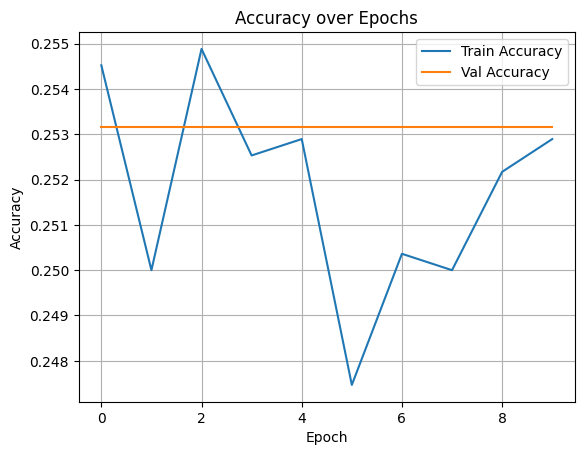

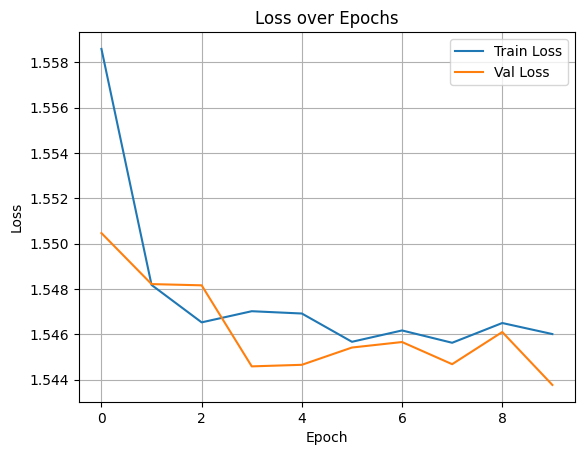

In [9]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.grid(True)
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.grid(True)
plt.show()
